#<h1><center>**Natural Language Processing - XPOS MULTEXT East POS Project**</center></h1>
#<h1><center>**2023./2024.**</center></h1>
#<h2><center>*Grgur Živković, Mia Mužinić*</center></h1>


---


#<h1><center>**Data Preprocessing**</center></h1>

***MULTEXT-East*** is a multilingual dataset for language engineering research, focused on the morphosyntactic level of linguistic description1. It includes morphosyntactic specifications, morphosyntactic lexica, and a parallel corpus. The resources cover 16 languages, mainly from Central and Eastern Europe.

***The XPOS tagging***, also known as treebank-specific POS tagging, is a more detailed form of Part-of-Speech (POS) tagging, used in MULTEXT-East. A POS tagset is a list of part-of-speech tags (POS tags for short), i.e., labels used to indicate the part of speech and sometimes also other grammatical categories (case, tense etc.) of each token in a text corpus.

While universal POS (UPOS) tags provide a basic level of linguistic categorization (like ‘noun’, ‘verb’, ‘adjective’, etc.), XPOS tags offer a more granular level of detail that is specific to a particular language or treebank.

For example, in English, the UPOS tag might simply label a word as a ‘verb’. However, the XPOS tag could provide additional information such as the verb tense (past, present, future), mood (indicative, subjunctive), voice (active, passive), and so on.

For example, in the MULTEXT-East Morphosyntactic Croatian Specification, a noun is represented as follows:

>Croatian Specification for Noun P <br>
Attribute (en) Value (en) Code (en) <br>
0 CATEGORY Noun N <br>
1 Type common c \n proper p <br>
2 Gender masculine m \n feminine f \n neuter n <br>
3 Number singular s \n plural p <br>
4 Case nominative n \n genitive g \n dative d \n accusative a \n vocative v \n locative l \n instrumental i <br>
5 Animate no n \n yes y

Each attribute (like Type, Gender, Number, etc.) has specific values and codes associated with it.

*The purpose of XPOS tagging* is to capture these language-specific morphosyntactic details that are not covered by the universal POS tags. This additional layer of information can greatly enhance the accuracy of Natural Language Processing (NLP) tasks such as syntactic parsing, machine translation, information extraction, and others.

## 1. Installing required libraries


In [ ]:
!pip install conllu

In [ ]:
from io import open
from conllu import parse_incr, parse

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Data loading

### Train dataset

In [ ]:
# Define file path
file_path = '/content/drive/MyDrive/NLP2024/hr500k-train.conllu'

with open(file_path, 'r') as file:
    # Read the content of the file
    dataset_train = file.read()

conllu_parsed_train = parse(dataset_train)
print(conllu_parsed_train[:5])

[TokenList<Kazna, medijskom, mogulu, obnovila, raspravu, u, Makedoniji, metadata={newdoc id: "set.hr.2", url: "NA", sent_id: "set.hr-s36", text: "Kazna medijskom mogulu obnovila raspravu u Makedoniji"}>, TokenList<Neki, tvrde, da, je, presuda, Veliji, Ramkovskom, napad, na, slobodu, medija, ,, dok, drugi, tvrde, kako, dokazi, o, njegovim, kaznenim, djelima, govore, suprotno, ., metadata={sent_id: "set.hr-s37", text: "Neki tvrde da je presuda Veliji Ramkovskom napad na slobodu medija, dok drugi tvrde kako dokazi o njegovim kaznenim djelima govore suprotno."}>, TokenList<Medijski, mogul, Velija, Ramkovski, osuđen, je, na, 13, godina, zatvora, zbog, utaje, poreza, i, pranja, novca, ., metadata={sent_id: "set.hr-s38", text: "Medijski mogul Velija Ramkovski osuđen je na 13 godina zatvora zbog utaje poreza i pranja novca."}>, TokenList<Kaznena, presuda, i, zatvorska, kazna, medijskom, mogulu, Veliji, Ramkovskom, ,, koji, je, često, kritizirao, makedonsku, vladu, ,, mogla, bi, zaplašiti, medi

In [ ]:
conllu_parsed_train[0][0]

{'id': 1,
 'form': 'Kazna',
 'lemma': 'kazna',
 'upos': 'NOUN',
 'xpos': 'Ncfsn',
 'feats': {'Case': 'Nom', 'Gender': 'Fem', 'Number': 'Sing'},
 'head': 4,
 'deprel': 'nsubj',
 'deps': None,
 'misc': {'DP': '4:Sb', 'SRL': '4:ACT'}}

In [ ]:
tokens_train = list([])
xpos_train = list([])

for tokenList in conllu_parsed_train:
  xpos_list_train = list([])
  token_list_train = list([])

  for token in tokenList:
      token_list_train.append(token["form"])
      xpos_list_train.append(token["xpos"])

  xpos_train.append(xpos_list_train)
  tokens_train.append(token_list_train)

In [ ]:
tokens_train[:2]

[['Kazna', 'medijskom', 'mogulu', 'obnovila', 'raspravu', 'u', 'Makedoniji'],
 ['Neki',
  'tvrde',
  'da',
  'je',
  'presuda',
  'Veliji',
  'Ramkovskom',
  'napad',
  'na',
  'slobodu',
  'medija',
  ',',
  'dok',
  'drugi',
  'tvrde',
  'kako',
  'dokazi',
  'o',
  'njegovim',
  'kaznenim',
  'djelima',
  'govore',
  'suprotno',
  '.']]

In [ ]:
xpos_train[:2]

[['Ncfsn', 'Agpmsdy', 'Ncmsd', 'Vmp-sf', 'Ncfsa', 'Sl', 'Npfsl'],
 ['Pi-mpn',
  'Vmr3p',
  'Cs',
  'Var3s',
  'Ncfsn',
  'Npmsd',
  'Npmsd',
  'Ncmsn',
  'Sa',
  'Ncfsa',
  'Ncmpg',
  'Z',
  'Cs',
  'Mlompn',
  'Vmr3p',
  'Cs',
  'Ncmpn',
  'Sl',
  'Ps3npl',
  'Agpnply',
  'Ncnpl',
  'Vmr3p',
  'Rgp',
  'Z']]

In [ ]:
data_train = pd.DataFrame({"tokens": tokens_train, "xpos": xpos_train})

In [ ]:
data_train.head(5)

,tokens,xpos
0,"[Kazna, medijskom, mogulu, obnovila, raspravu,...","[Ncfsn, Agpmsdy, Ncmsd, Vmp-sf, Ncfsa, Sl, Npfsl]"
1,"[Neki, tvrde, da, je, presuda, Veliji, Ramkovs...","[Pi-mpn, Vmr3p, Cs, Var3s, Ncfsn, Npmsd, Npmsd..."
2,"[Medijski, mogul, Velija, Ramkovski, osuđen, j...","[Agpmsny, Ncmsn, Npmsn, Npmsn, Appmsnn, Var3s,..."
3,"[Kaznena, presuda, i, zatvorska, kazna, medijs...","[Agpfsny, Ncfsn, Cc, Agpfsny, Ncfsn, Agpmsdy, ..."
4,"[Ramkovski, ,, bivši, vlasnik, televizijske, p...","[Npmsn, Z, Agpmsny, Ncmsn, Agpfsgy, Ncfsg, X, ..."


Explanation

`Ncfsn:` Noun, common, feminine, singular, nominative <br>
`Agpmsdy:` Adverb, general, masculine, singular, dative <br>
`Ncmsd:` Noun, common, masculine, singular, dative <br>
`Vmp-sf:` Verb, main, past tense, feminine <br>
`Ncfsa:` Noun, common, feminine, singular, accusative <br>
`Sl:` Login <br>
`Npfsl:` Noun, proper, feminine, plural, nominative <br>
`Pi-mpn:` Pronoun, indefinite, masculine, plural, nominative <br>
`Vmr3p:` Verb, reflexive, 3rd person, plural <br>
`Cs:` Conjunction, subordinating <br>
`Var3s:` Verb, auxiliary, 3rd person, singular <br>
`Npmsd:` Noun, proper, masculine, singular, dative <br>
`Ncmsn:` Noun, common, masculine, singular, nominative <br>
`Sa:` Login <br>
`Ncfsa:` Noun, common, feminine, singular, accusative <br>
`Ncmpg:` Noun, common, masculine, plural, genitive <br>
`Z:` Punctuation mark <br>
`Mlompn:` Number, cardinal, masculine, plural, nominative <br>
`Ncmpn:` Noun, common, masculine, plural, nominative <br>
`Ps3npl:` Pronoun, possessive, 3rd person, neuter, plural <br>
`Agpnply:` Adverb, general, neuter, plural, lative <br>
`Ncnpl:` Noun, common, neuter, plural <br>
`Rgp:` Adverb, general <br>
`Z:` Punctuation mark <br>

### Validation dataset

In [ ]:
# Define file path
file_path = '/content/drive/MyDrive/NLP2024/hr500k-dev.conllu'

with open(file_path, 'r') as file:
    # Read the content of the file
    dataset_dev = file.read()

conllu_parsed_dev = parse(dataset_dev)
print(conllu_parsed_dev[:5])

[TokenList<Proces, privatizacije, na, Kosovu, pod, povećalom, metadata={newdoc id: "set.hr.1", url: "NA", sent_id: "set.hr-s1", text: "Proces privatizacije na Kosovu pod povećalom"}>, TokenList<Kosovo, ozbiljno, analizira, proces, privatizacije, u, svjetlu, učestalih, pritužbi, ., metadata={sent_id: "set.hr-s2", text: "Kosovo ozbiljno analizira proces privatizacije u svjetlu učestalih pritužbi."}>, TokenList<Feronikel, je, privatiziran, prije, pet, godina, i, još, uvijek, posluje, ,, ali, u, ozračju, zabrinutosti, za, sigurnost, radnika, ., metadata={sent_id: "set.hr-s3", text: "Feronikel je privatiziran prije pet godina i još uvijek posluje, ali u ozračju zabrinutosti za sigurnost radnika."}>, TokenList<Barem, na, papiru, ,, izgleda, kao, odlična, ideja, ., metadata={sent_id: "set.hr-s4", text: "Barem na papiru, izgleda kao odlična ideja."}>, TokenList<Vlada, prodaje, poduzeća, ,, rješava, se, opterećenja, njihovog, upravljanja, ,, a, novac, od, prodaje, pomaže, punjenju, državnog, pr

In [ ]:
conllu_parsed_dev[0][0]

{'id': 1,
 'form': 'Proces',
 'lemma': 'proces',
 'upos': 'NOUN',
 'xpos': 'Ncmsn',
 'feats': {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing'},
 'head': 6,
 'deprel': 'nsubj',
 'deps': None,
 'misc': {'DP': '0:Elp'}}

In [ ]:
tokens_dev = list([])
xpos_dev = list([])

for tokenList in conllu_parsed_dev:
  xpos_list_dev = list([])
  token_list_dev = list([])

  for token in tokenList:
      token_list_dev.append(token["form"])
      xpos_list_dev.append(token["xpos"])

  xpos_dev.append(xpos_list_dev)
  tokens_dev.append(token_list_dev)

In [ ]:
tokens_dev[:2]

[['Proces', 'privatizacije', 'na', 'Kosovu', 'pod', 'povećalom'],
 ['Kosovo',
  'ozbiljno',
  'analizira',
  'proces',
  'privatizacije',
  'u',
  'svjetlu',
  'učestalih',
  'pritužbi',
  '.']]

In [ ]:
xpos_dev[:2]

[['Ncmsn', 'Ncfsg', 'Sl', 'Npnsl', 'Si', 'Ncnsi'],
 ['Npnsn',
  'Rgp',
  'Vmr3s',
  'Ncmsan',
  'Ncfsg',
  'Sl',
  'Ncnsl',
  'Agpfpgy',
  'Ncfpg',
  'Z']]

In [ ]:
data_dev = pd.DataFrame({"tokens": tokens_dev, "xpos": xpos_dev})

In [ ]:
data_dev.head(5)

,tokens,xpos
0,"[Proces, privatizacije, na, Kosovu, pod, poveć...","[Ncmsn, Ncfsg, Sl, Npnsl, Si, Ncnsi]"
1,"[Kosovo, ozbiljno, analizira, proces, privatiz...","[Npnsn, Rgp, Vmr3s, Ncmsan, Ncfsg, Sl, Ncnsl, ..."
2,"[Feronikel, je, privatiziran, prije, pet, godi...","[Npmsn, Var3s, Appmsnn, Sg, Mlc, Ncfpg, Cc, Rg..."
3,"[Barem, na, papiru, ,, izgleda, kao, odlična, ...","[Qo, Sl, Ncmsl, Z, Vmr3s, Cs, Agpfsny, Ncfsn, Z]"
4,"[Vlada, prodaje, poduzeća, ,, rješava, se, opt...","[Npfsn, Vmr3s, Ncnpa, Z, Vmr3s, Px--sa, Ncnsg,..."


### Test dataset

In [ ]:
# Define file path
file_path = '/content/drive/MyDrive/NLP2024/hr500k-test.conllu'

with open(file_path, 'r') as file:
    # Read the content of the file
    dataset_test = file.read()

conllu_parsed_test = parse(dataset_test)
print(conllu_parsed_test[:5])

[TokenList<Beograd, i, Priština, postigli, dogovor, o, slobodi, kretanja, metadata={newdoc id: "set.hr.11", url: "NA", sent_id: "set.hr-s297", text: "Beograd i Priština postigli dogovor o slobodi kretanja"}>, TokenList<Pregovarački, timovi, Beograda, i, Prištine, usuglasili, su, se, u, Bruxellesu, oko, nacrta, sporazuma, o, slobodi, kretanja, i, matičnim, knjigama, rođenih, ., metadata={sent_id: "set.hr-s298", text: "Pregovarački timovi Beograda i Prištine usuglasili su se u Bruxellesu oko nacrta sporazuma o slobodi kretanja i matičnim knjigama rođenih."}>, TokenList<Neki, tvrde, kako, su, sporazumi, korak, prema, konačnom, priznanju, Kosova, od, strane, Srbije, ., metadata={sent_id: "set.hr-s299", text: "Neki tvrde kako su sporazumi korak prema konačnom priznanju Kosova od strane Srbije."}>, TokenList<Dok, vlasti, u, Beogradu, pokušavaju, predstaviti, prve, sporazume, s, Prištinom, kao, uspjeh, koji, će, pomoći, u, unapređenju, života, kosovskih, Srba, ,, oporba, ih, je, opisala, štet

In [ ]:
conllu_parsed_test[0][0]

{'id': 1,
 'form': 'Beograd',
 'lemma': 'Beograd',
 'upos': 'PROPN',
 'xpos': 'Npmsn',
 'feats': {'Case': 'Nom', 'Gender': 'Masc', 'Number': 'Sing'},
 'head': 4,
 'deprel': 'nsubj',
 'deps': None,
 'misc': {'NamedEntity': 'Yes', 'NER': 'B-loc', 'DP': '2:Sb', 'SRL': '4:ACT'}}

In [ ]:
tokens_test = list([])
xpos_test = list([])

for tokenList in conllu_parsed_test:
  xpos_list_test = list([])
  token_list_test = list([])

  for token in tokenList:
      token_list_test.append(token["form"])
      xpos_list_test.append(token["xpos"])

  xpos_test.append(xpos_list_test)
  tokens_test.append(token_list_test)

In [ ]:
tokens_test[:2]

[['Beograd',
  'i',
  'Priština',
  'postigli',
  'dogovor',
  'o',
  'slobodi',
  'kretanja'],
 ['Pregovarački',
  'timovi',
  'Beograda',
  'i',
  'Prištine',
  'usuglasili',
  'su',
  'se',
  'u',
  'Bruxellesu',
  'oko',
  'nacrta',
  'sporazuma',
  'o',
  'slobodi',
  'kretanja',
  'i',
  'matičnim',
  'knjigama',
  'rođenih',
  '.']]

In [ ]:
xpos_test[:2]

[['Npmsn', 'Cc', 'Npfsn', 'Vmp-pm', 'Ncmsan', 'Sl', 'Ncfsl', 'Ncnsg'],
 ['Agpmpny',
  'Ncmpn',
  'Npmsg',
  'Cc',
  'Npfsg',
  'Vmp-pm',
  'Var3p',
  'Px--sa',
  'Sl',
  'Npmsl',
  'Sg',
  'Ncmsg',
  'Ncmsg',
  'Sl',
  'Ncfsl',
  'Ncnsg',
  'Cc',
  'Agpfply',
  'Ncfpl',
  'Agpmpgy',
  'Z']]

In [ ]:
data_test = pd.DataFrame({"tokens": tokens_test, "xpos": xpos_test})

In [ ]:
data_test.head(5)

,tokens,xpos
0,"[Beograd, i, Priština, postigli, dogovor, o, s...","[Npmsn, Cc, Npfsn, Vmp-pm, Ncmsan, Sl, Ncfsl, ..."
1,"[Pregovarački, timovi, Beograda, i, Prištine, ...","[Agpmpny, Ncmpn, Npmsg, Cc, Npfsg, Vmp-pm, Var..."
2,"[Neki, tvrde, kako, su, sporazumi, korak, prem...","[Pi-mpn, Vmr3p, Cs, Var3p, Ncmpn, Ncmsn, Sl, A..."
3,"[Dok, vlasti, u, Beogradu, pokušavaju, predsta...","[Cs, Ncfpn, Sl, Npmsl, Vmr3p, Vmn, Mlompa, Ncm..."
4,"[Nakon, završetka, razgovora, u, Bruxellesu, ,...","[Sg, Ncmsg, Ncmpg, Sl, Npmsl, Z, Ncmsn, Ncnsg,..."


## 3. Descriptive statistics

**Training dataset**

In [ ]:
# Convert pandas DataFrame to PyTorch tensor
sentence_tensor = torch.tensor(data_train['tokens'].apply(len).values)
xpos_tensor = torch.tensor(data_train['xpos'].apply(len).values)

# Calculate mean, std, min, max
sentence_mean = torch.mean(sentence_tensor.float())
sentence_std = torch.std(sentence_tensor.float())
sentence_min = torch.min(sentence_tensor.float())
sentence_max = torch.max(sentence_tensor.float())

xpos_mean = torch.mean(xpos_tensor.float())
xpos_std = torch.std(xpos_tensor.float())
xpos_min = torch.min(xpos_tensor.float())
xpos_max = torch.max(xpos_tensor.float())

print(f'Information about training dataset')
print(f'Sentence Length - Mean: {sentence_mean}, Std: {sentence_std}, Min: {sentence_min}, Max: {sentence_max}')
print(f'Xpos Length - Mean: {xpos_mean}, Std: {xpos_std}, Min: {xpos_min}, Max: {xpos_max}')


Information about training dataset
Sentence Length - Mean: 20.144559860229492, Std: 12.796849250793457, Min: 1.0, Max: 255.0
Xpos Length - Mean: 20.144559860229492, Std: 12.796849250793457, Min: 1.0, Max: 255.0


In [ ]:
# DataFrame information
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19791 entries, 0 to 19790
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tokens  19791 non-null  object
 1   xpos    19791 non-null  object
dtypes: object(2)
memory usage: 309.4+ KB


In [ ]:
# Basic statistics
data_train.describe()

,tokens,xpos
count,19791,19791
unique,19701,19420
top,[Komentari],"[Rgp, Z]"
freq,10,24


In [ ]:
# Sentence Length Analysis: Analyze the distribution of sentence lengths in our dataset.
# This can give us insights into the variety of sentence lengths we are dealing with.

sentence_lengths_train = data_train['tokens'].apply(len)
print(sentence_lengths_train.describe())

count    19791.000000
mean        20.144561
std         12.796849
min          1.000000
25%         11.000000
50%         18.000000
75%         27.000000
max        255.000000
Name: tokens, dtype: float64


In [ ]:
# XPOS Tag Frequency Analysis: Analyze the frequency of different XPOS tags in our dataset.
# This can give us insights into the grammatical composition of our text data.

xpos_tags_train = [tag for sublist in data_train['xpos'] for tag in sublist]
xpos_freq_train = pd.Series(xpos_tags_train).value_counts()
print(xpos_freq_train)

Z          48477
Rgp        18413
Cc         17340
Var3s      14065
Sl         13541
           ...  
Appmsvy        1
Pq-fpa         1
Appfpvy        1
Ps2npa         1
Ps1npi         1
Length: 746, dtype: int64


In [ ]:
# Word Frequency Analysis: Analyze the frequency of different words in our dataset.
# This can give us insights into the most common and rare words in our text data.

words_train = [word for sublist in data_train['tokens'] for word in sublist]
word_freq_train = pd.Series(words_train).value_counts()
print(word_freq_train)

,                 20752
.                 15950
i                 12005
je                11116
u                  9591
                  ...  
netočno               1
indicirana            1
levonorgestrel        1
re-emitiranja         1
izrađenom             1
Length: 63774, dtype: int64


**Validation dataset**

In [ ]:
# Convert pandas DataFrame to PyTorch tensor
sentence_tensor = torch.tensor(data_dev['tokens'].apply(len).values)
xpos_tensor = torch.tensor(data_dev['xpos'].apply(len).values)

# Calculate mean, std, min, max
sentence_mean = torch.mean(sentence_tensor.float())
sentence_std = torch.std(sentence_tensor.float())
sentence_min = torch.min(sentence_tensor.float())
sentence_max = torch.max(sentence_tensor.float())

xpos_mean = torch.mean(xpos_tensor.float())
xpos_std = torch.std(xpos_tensor.float())
xpos_min = torch.min(xpos_tensor.float())
xpos_max = torch.max(xpos_tensor.float())

print(f'Information about validation dataset')
print(f'Sentence Length - Mean: {sentence_mean}, Std: {sentence_std}, Min: {sentence_min}, Max: {sentence_max}')
print(f'Xpos Length - Mean: {xpos_mean}, Std: {xpos_std}, Min: {xpos_min}, Max: {xpos_max}')


Information about validation dataset
Sentence Length - Mean: 20.017698287963867, Std: 13.048203468322754, Min: 1.0, Max: 100.0
Xpos Length - Mean: 20.017698287963867, Std: 13.048203468322754, Min: 1.0, Max: 100.0


In [ ]:
# DataFrame information
data_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tokens  2486 non-null   object
 1   xpos    2486 non-null   object
dtypes: object(2)
memory usage: 39.0+ KB


In [ ]:
# Basic statistics
data_dev.describe()

,tokens,xpos
count,2486,2486
unique,2472,2429
top,"[odličan, (, 5, )]","[Agpmsnn, Z, Mdc, Z]"
freq,3,10


In [ ]:
# Sentence Length Analysis: Analyze the distribution of sentence lengths in our dataset.
# This can give us insights into the variety of sentence lengths we are dealing with.

sentence_lengths_dev = data_dev['tokens'].apply(len)
print(sentence_lengths_dev.describe())

count    2486.000000
mean       20.017699
std        13.048204
min         1.000000
25%        10.000000
50%        18.000000
75%        27.000000
max       100.000000
Name: tokens, dtype: float64


In [ ]:
# XPOS Tag Frequency Analysis: Analyze the frequency of different XPOS tags in our dataset.
# This can give us insights into the grammatical composition of our text data.

xpos_tags_dev = [tag for sublist in data_dev['xpos'] for tag in sublist]
xpos_freq_dev = pd.Series(xpos_tags_dev).value_counts()
print(xpos_freq_dev)

Z           6226
Rgp         2341
Cc          2266
Var3s       1756
Sl          1533
            ... 
Agcnpay        1
Appmsany       1
Agpmsln        1
Pd-npn         1
Ps1fpg         1
Length: 568, dtype: int64


In [ ]:
# Word Frequency Analysis: Analyze the frequency of different words in our dataset.
# This can give us insights into the most common and rare words in our text data.

words_dev = [word for sublist in data_dev['tokens'] for word in sublist]
word_freq_dev = pd.Series(words_dev).value_counts()
print(word_freq_dev)

,               2765
.               2008
i               1568
je              1412
u               1155
                ... 
preporučeno        1
suzdržavaju        1
prekomjernog       1
konzumiranja       1
pomoglo            1
Length: 15006, dtype: int64


**Training dataset**

In [ ]:
# Convert pandas DataFrame to PyTorch tensor
sentence_tensor = torch.tensor(data_test['tokens'].apply(len).values)
xpos_tensor = torch.tensor(data_test['xpos'].apply(len).values)

# Calculate mean, std, min, max
sentence_mean = torch.mean(sentence_tensor.float())
sentence_std = torch.std(sentence_tensor.float())
sentence_min = torch.min(sentence_tensor.float())
sentence_max = torch.max(sentence_tensor.float())

xpos_mean = torch.mean(xpos_tensor.float())
xpos_std = torch.std(xpos_tensor.float())
xpos_min = torch.min(xpos_tensor.float())
xpos_max = torch.max(xpos_tensor.float())

print(f'Information about testing dataset')
print(f'Sentence Length - Mean: {sentence_mean}, Std: {sentence_std}, Min: {sentence_min}, Max: {sentence_max}')
print(f'Xpos Length - Mean: {xpos_mean}, Std: {xpos_std}, Min: {xpos_min}, Max: {xpos_max}')

Information about testing dataset
Sentence Length - Mean: 20.591310501098633, Std: 12.370256423950195, Min: 1.0, Max: 142.0
Xpos Length - Mean: 20.591310501098633, Std: 12.370256423950195, Min: 1.0, Max: 142.0


In [ ]:
# DataFrame information
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tokens  2486 non-null   object
 1   xpos    2486 non-null   object
dtypes: object(2)
memory usage: 39.0+ KB


In [ ]:
# Basic statistics
data_test.describe()

,tokens,xpos
count,2486,2486
unique,2483,2479
top,[Komentari],[Ncmpn]
freq,3,3


In [ ]:
# Sentence Length Analysis: Analyze the distribution of sentence lengths in our dataset.
# This can give us insights into the variety of sentence lengths we are dealing with.

sentence_lengths_test = data_test['tokens'].apply(len)
print(sentence_lengths_test.describe())

count    2486.000000
mean       20.591311
std        12.370257
min         1.000000
25%        12.000000
50%        18.000000
75%        27.000000
max       142.000000
Name: tokens, dtype: float64


In [ ]:
# XPOS Tag Frequency Analysis: Analyze the frequency of different XPOS tags in our dataset.
# This can give us insights into the grammatical composition of our text data.

xpos_tags_test = [tag for sublist in data_test['xpos'] for tag in sublist]
xpos_freq_test = pd.Series(xpos_tags_test).value_counts()
print(xpos_freq_test)

Z          6493
Cc         2220
Rgp        2138
Sl         1775
Var3s      1699
           ... 
Appmsly       1
Appmpiy       1
Appmsdy       1
Ps3npn        1
Ps1mpv        1
Length: 576, dtype: int64


In [ ]:
# Word Frequency Analysis: Analyze the frequency of different words in our dataset.
# This can give us insights into the most common and rare words in our text data.

words_test = [word for sublist in data_test['tokens'] for word in sublist]
word_freq_test = pd.Series(words_test).value_counts()
print(word_freq_test)

,             2786
.             2065
i             1591
je            1355
u             1279
              ... 
krugova          1
tridesetih       1
doznajemo        1
Županijske       1
moji             1
Length: 15493, dtype: int64


### Train/Validation/Test

In [ ]:
X_train = data_train['tokens']
Y_train = data_train['xpos']
X_dev = data_dev['tokens']
Y_dev = data_dev['xpos']
X_test = data_test['tokens']
Y_test = data_test['xpos']

**Train dataset**

In [ ]:
# Creating a set of unique part-of-speech tags found in the training data
xpos_tags_train = set([word.lower() for sentence in Y_train for word in sentence])
print("Total number of sentences in training dataset is {}".format(len(X_train)))

# Total number of unique tags
num_xpos_tags_train = len(xpos_tags_train)

# Total number of unique words found in the training data
num_unique_words_train = len(set([word.lower() for sentence in X_train for word in sentence]))
print("Total number of unique words in training datasetis {}".format(num_unique_words_train))

# Printing information about XPOS tags
print("\nXPOS tags:")
for xpos_tag_train in xpos_tags_train:
    print(xpos_tag_train, end=', ')
print("\nTotal number of XPOS tags in training dataset: {}".format(num_xpos_tags_train))


Total number of sentences in training dataset is 19791
Total number of unique words in training datasetis 58133

XPOS tags:
pp1-pn, aspmpgy, ncnsa, agpfply, npfsv, agsnpny, aspmsiy, pp3msd, ps3npd, mlcmpg, appmsany, pq3m-a, ps1nsn, mlomsd, var1p, vmp-pm, mlsf-d, agsmsayy, pp3fsn, npmsv, appfply, xf, ncfsi, vaa3p, ncnsd, ncfpa, pi-fsl, appfpny, mlcn-n, ncfpv, vap-sf, appnsly, appmsvy, pp3msn, ps2mpd, pp3fsg, pp2-sd, pp2-sn, si, agsfpdy, pi-nsl, mlonsg, agsfsgy, agsmpvy, vmm2p, agsmsdy, vme1s, ncmsay, agcmsly, pd-npl, agpnsdy, mlonpn, mlcmsn, agpfpvy, pi-npn, ps1fpa, pi-mpg, pd-npd, ncnpi, agsnsny, ps3mpd, ps2mpn, mlsm-g, pi-fpa, pp3-pi, agsmpay, ps1fsv, vmp-pn, mlofsi, npfpa, agpfpdy, mlcfsn, ps3nsa, ncmsd, ps2nsa, mlonpa, mlsf-a, ncmsg, pi-msg, vmn, ps1mpl, agsnply, appmsann, pi-nsd, ps2msn, agsnsly, px-msn, pi3n-a, appfpdy, appfsvy, pp3nsd, vma2p, var1s, px-msg, agcfpgy, px-fsn, ncnsl, npmsg, appnply, mlcm-d, mlcfpn, vmp-sm, pq-nsn, aspfsdy, agcmpay, vmr3s, mlcf-g, pi3m-l, ps3fpa, asp

In [ ]:
# Finding the longest and the shortest sentences in the training dataset
longest_sentence_train = np.argmax([len(sentence) for sentence in X_train])
print("The longest sentence in training dataset: ",X_train[longest_sentence_train])

shortest_sentence_train = np.argmin([len(sentence) for sentence in X_train])
print("The shortest sentence in training dataset: ", X_train[shortest_sentence_train])

The longest sentence in training dataset:  ['Danas', ',', 'kada', 'postoji', 'od', '3.5', 'do', 'uber', '5.0', 'dijagonala', 'displaya', ',', 'x', 'vrsta', 'ekrana', ',', 'xy', 'rezolucija', 'ekrana', ',', 'prelazak', 'sa', 'modela', '4', 'na', '4', 's', ',', 'mi', 'je', 'definitvno', 'premalo', 'u', 'svakom', 'pogledu', ',', 'a', 'primarno', 'što', 'je', 'za', 'moj', 'ukus', 'premalen', 'dimenzijama', '(', 'onako', ',', 'glasno', 'razmišljajući', ',', 'kako', 'bi', 'opako', 'dobar', 'bio', 'Ipad', '3', 'sa', '4', 'xretina', 'zaslonom', ',', 'koja', 'bi', 'to', 'samo', 'bila', 'rezolucija', ',', 'a', 'tek', 'ekran', ',', 'ali', 'uz', 'tek', '7', 'incha', 'dijagonalu', ',', 'ili', 'sam', 'omalo', 'veću', ',', 'do', '10', 'malo', 'ipak', 'fali', ',', 'a', 'opet', ',', 'koja', 'je', 'to', 'pak', 'rezolucija', ',', 'uf', ',', 'što', 'bi', 'rekao', 'Mićo', 'Dušanović', ')', ',', 'čak', 'i', 'da', 'Siri', 'funkcionira', 'u', 'Europi', ',', 'ali', 'masu', 'toga', 'ne', 'šljaka', 'u', 'ovoj', 

**Validation dataset**

In [ ]:
# Creating a set of unique part-of-speech tags found in the validation data
xpos_tags_dev = set([word.lower() for sentence in Y_dev for word in sentence])
print("Total number of sentences in validation set is {}".format(len(X_dev)))

# Total number of unique tags
num_xpos_tags_dev = len(xpos_tags_dev)

# Total number of unique words found in the validation data
num_unique_words_dev = len(set([word.lower() for sentence in X_train for word in sentence]))
print("Total number of unique words in validation dataset is {}".format(num_unique_words_dev))

# Printing information about XPOS tags
print("\nXPOS tags:")
for xpos_tag_dev in xpos_tags_dev:
    print(xpos_tag_dev, end=', ')
print("\nTotal number of XPOS tags in validation dataset: {}".format(num_xpos_tags_dev))


Total number of sentences in validation set is 2486
Total number of unique words in validation dataset is 58133

XPOS tags:
pp1-pn, aspmpgy, ncnsa, agpfply, agsnpny, aspmsiy, pp3msd, appmsany, mlomsd, ps1nsn, var1p, vmp-pm, pp3fsn, npmsv, appfply, xf, ncfsi, vaa3p, ncnsd, ncfpa, pi-fsl, appfpny, vap-sf, appnsly, pp3msn, ps2mpd, pp2-sd, pp3fsg, pp2-sn, si, agsfpdy, pi-nsl, agsfsgy, vmm2p, ncmsay, agpnsdy, mlcmsn, pi-npn, ps1fpa, pi-mpg, ncnpi, agsnsny, ps3mpd, mlsm-g, pi-fpa, pp3-pi, agsmpay, vmp-pn, npfpa, agpfpdy, mlcfsn, ps3nsa, ncmsd, ps2nsa, ncmsg, pi-msg, vmn, appmsann, pi-nsd, ps2msn, pi3n-a, var1s, px-msg, agcfpgy, ncnsl, npmsg, appnply, vmp-sm, agcmpay, vmr3s, mlcf-g, ps3fpa, pi-nsi, pi-msay, ncmpv, pd-msl, mlonsi, pd-fpa, ps1nsa, agpmsiy, px-mpi, vmm1p, agpnsgy, sl, mlomsn, npfsd, appnpny, agpnpdy, npnpg, agpmsly, pi-mpi, appmsny, mlofpi, ncfsv, ps3msn, agcmsny, pp3-pg, appmsiy, pi3n-n, px-fpl, ncmsan, pi-fsi, y, vap-pm, mrc, px-fsa, mlcmsl, pi-mpl, px-msl, npmsi, pi3n-l, px-m

In [ ]:
# Finding the longest and the shortest sentences in the validation dataset
longest_sentence_dev = np.argmax([len(sentence) for sentence in X_dev])
print("The longest sentence in validation dataset: ",X_dev[longest_sentence_dev])

shortest_sentence_dev = np.argmin([len(sentence) for sentence in X_dev])
print("The shortest sentence in validation dataset: ", X_dev[shortest_sentence_dev])

The longest sentence in validation dataset:  ['Moj', 'problem', 'je', 'vezan', 'izravno', 'za', 'ljude', 'i', 'nalazi', 'se', 'svagdje', ',', 'a', 'ne', 'samo', 'u', 'nas', 'na', 'faksu', '(', 'kad', 'su', 'spomenuti', 'zauzeti', 'kompjutori', ')', '-', 'sebično', 'i', 'jadno', 'ostavljanje', 'svojih', 'stvari', 'na', 'kompjutoru', '(', 'rjeđe', ')', 'ili', 'u', 'knjižnici', '(', 'češće', 'ali', 'me', 'ne', 'briga', 'jer', 'ne', 'učim', 'tamo', ',', 'ali', 'kad', 'prođem', 'i', 'vidim', 'da', 'je', 'knjižnica', 'dobila', 'ulogu', 'garderobe', 'digne', 'mi', 'se', 'tlak', 'i', 'poželim', 'im', 'na', 'čelu', 'žigosat', "'", "'", 'rezervirano', "'", "'", ',', 'poredat', 'ih', 'kraj', 'giljotine', 'negdje', 'ispred', 'faksa', 'i', 'glave', 'stavit', 'u', 'knjižnicu', 'pa', 'neka', 'se', 'zna', 'čije', 'je', 'mjesto', ')', '..']
The shortest sentence in validation dataset:  ['MIKROBIOLOGIJA']


**Test dataset**

In [ ]:
# Creating a set of unique part-of-speech tags found in the testing data
xpos_tags_test = set([word.lower() for sentence in Y_test for word in sentence])
print("Total number of sentences in testing dataset is {}".format(len(X_test)))

# Total number of unique tags
num_xpos_tags_test = len(xpos_tags_test)

# Total number of unique words found in the testing data
num_unique_words_test = len(set([word.lower() for sentence in X_test for word in sentence]))
print("Total number of unique words in testing dataset is {}".format(num_unique_words_test))

# Printing information about XPOS tags
print("\nXPOS tags:")
for xpos_tag_test in xpos_tags_test:
    print(xpos_tag_test, end=', ')
print("\nTotal number of XPOS tags in testing dataset: {}".format(num_xpos_tags_test))


Total number of sentences in testing dataset is 2486
Total number of unique words in testing dataset is 14530

XPOS tags:
pp1-pn, aspmpgy, ncnsa, agpfply, npfsv, aspmsiy, pp3msd, pq3m-a, ps1nsn, mlomsd, var1p, vmp-pm, agsmsayy, pp3fsn, npmsv, xf, ncfsi, vaa3p, ncnsd, ncfpa, pi-fsl, appfpny, vap-sf, appnsly, pp3msn, pp3fsg, pp2-sd, pp2-sn, si, agsfpdy, pi-nsl, mlonsg, agsfsgy, vmm2p, agsmsdy, ncmsay, agcmsly, agpnsdy, mlonpn, mlcmsn, pi-npn, ps1fpa, pi-mpg, ncnpi, agsnsny, ps3mpd, ps2mpn, mlsm-g, pi-fpa, pp3-pi, agsmpay, vmp-pn, mlofsi, agpfpdy, mlcfsn, ps2nsa, ncmsd, ps3nsa, mlsf-a, ncmsg, pi-msg, vmn, ps1mpl, appmsann, pi-nsd, ps2msn, pi3n-a, appfpdy, pp3nsd, var1s, px-msg, agcfpgy, npmsg, ncnsl, appnply, pq-fsi, vmp-sm, aspfsdy, agcmpay, vmr3s, mlcf-g, ps3fpa, pi-nsi, pi-msay, ncmpv, pd-msl, mlonsi, pd-fpa, ps1nsa, agpmsiy, px-mpi, vmm1p, agpnsgy, sl, mlomsn, agpnpdy, appnpny, npfsd, appmsgn, agpmsly, pi-mpi, appmsny, ncfsv, ps3msn, agcmsny, pp3-pg, pq-msn, pq-fsn, appmsiy, pi3n-n, p

In [ ]:
# Finding the longest and the shortest sentences in the testing dataset
longest_sentence_test = np.argmax([len(sentence) for sentence in X_test])
print("The longest sentence in testing dataset: ",X_test[longest_sentence_test])

shortest_sentence_test = np.argmin([len(sentence) for sentence in X_test])
print("The shortest sentence in testing dataset: ", X_test[shortest_sentence_test])

The longest sentence in testing dataset:  ['Naslov', 'Norme', 'nastavnika', 'moraju', 'se', 'povećati', 'jer', 'su', 'najniže', 'u', 'Europi', 'sigurno', 'ne', 'govori', 'o', 'marljivosti', 'i', 'vrijednosti', 'nastavnika', ',', 'to', 'se', 'čak', 'ne', 'može', 'ni', 'demantirati', ',', 'ali', 'u', 'čitavom', 'članku', 'na', 'dvije', 'strane', 'ne', 'spominje', 'se', 'da', 'naši', 'nastavnici', 'za', 'razliku', 'od', 'onih', 'europskih', ',', 'rade', 'u', 'dvije', 'ili', 'donedavno', 'čak', 'tri', 'smjene', ',', 'da', 'mnogi', 'rade', 'u', 'vrlo', 'lošim', 'uvjetima', '(', 'to', 'govori', 'da', 'se', 'i', 'naši', 'učenici', 'školuju', 'u', 'jednako', 'tako', 'lošim', 'uvjetima', ')', ',', 'u', 'učionicama', 'u', 'kojima', 'se', 'trese', 'pod', 'kad', 'pored', 'zgrade', 'prođe', 'tramvaj', ',', 'koji', 'nemaju', 'rolete', 'na', 'prozorima', 'pa', 'učenici', 'ne', 'mogu', 'zbog', 'sunca', 'pročitati', 'što', 'piše', 'na', 'ploči', '(', 'da', ',', 'kod', 'nas', 'u', 'mnogim', 'školama', '

## 4. Visualization

### Frequency Distribution of XPOS Tags

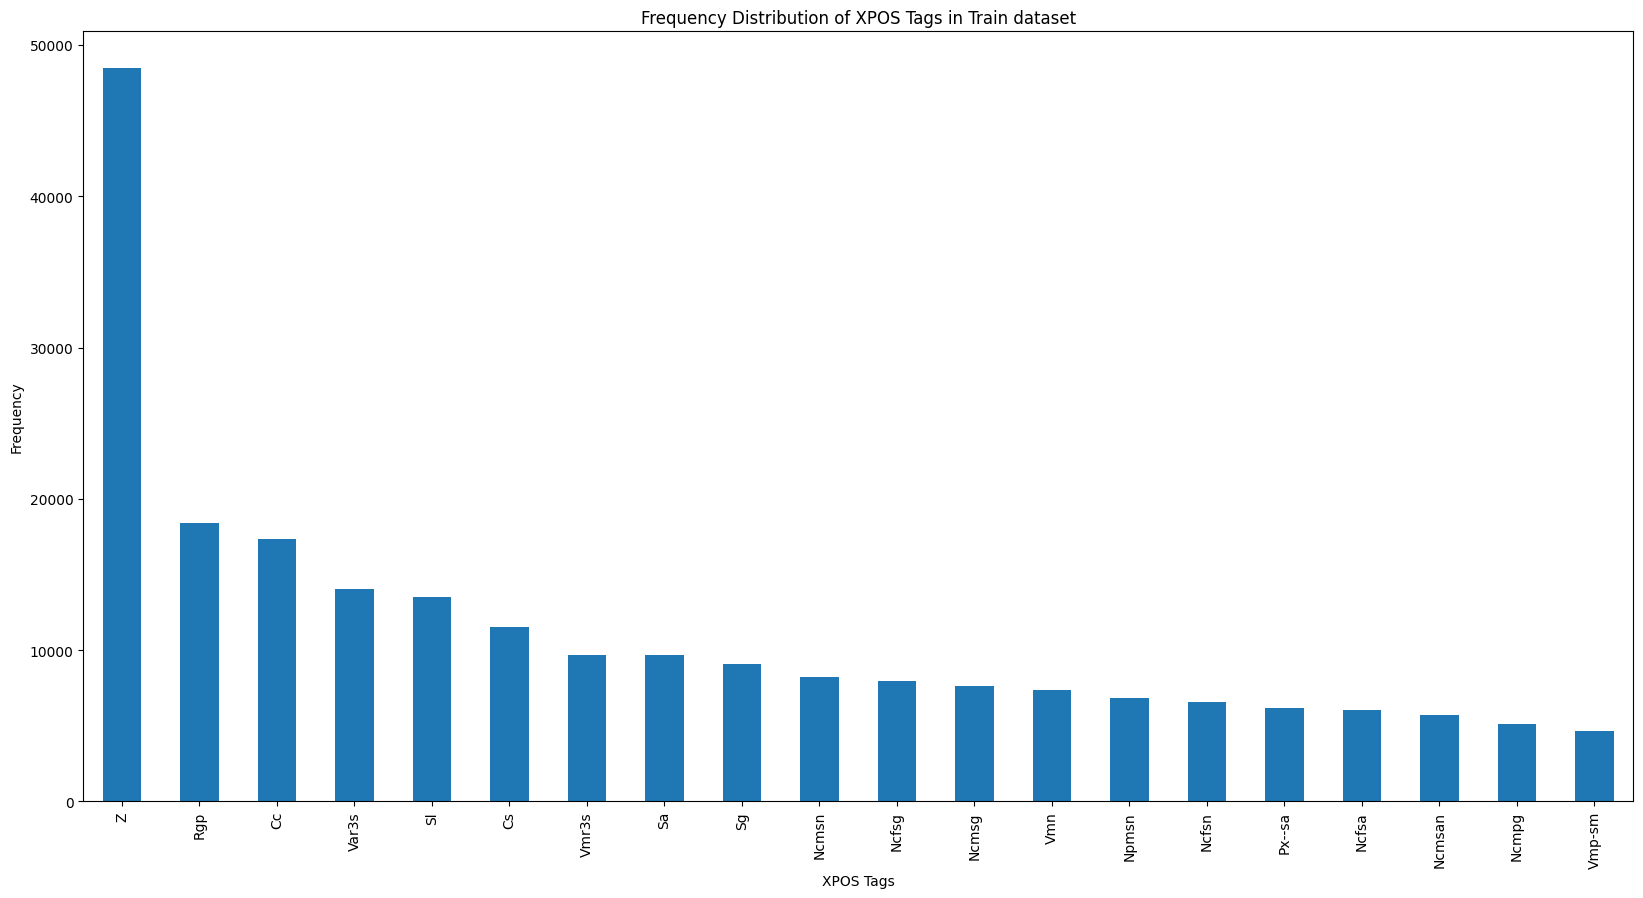

In [ ]:
# Flatten the list of xpos tags
flat_xpos = [item for sublist in xpos_train for item in sublist]

# Convert to pandas Series and count values
xpos_series = pd.Series(flat_xpos)
xpos_counts = xpos_series.value_counts()

# Plot
plt.figure(figsize=(20, 10))
# Plot the top N categories
N = 20
xpos_counts[:N].plot(kind='bar')
plt.title('Frequency Distribution of XPOS Tags in Train dataset')
plt.xlabel('XPOS Tags')
plt.ylabel('Frequency')
plt.show()

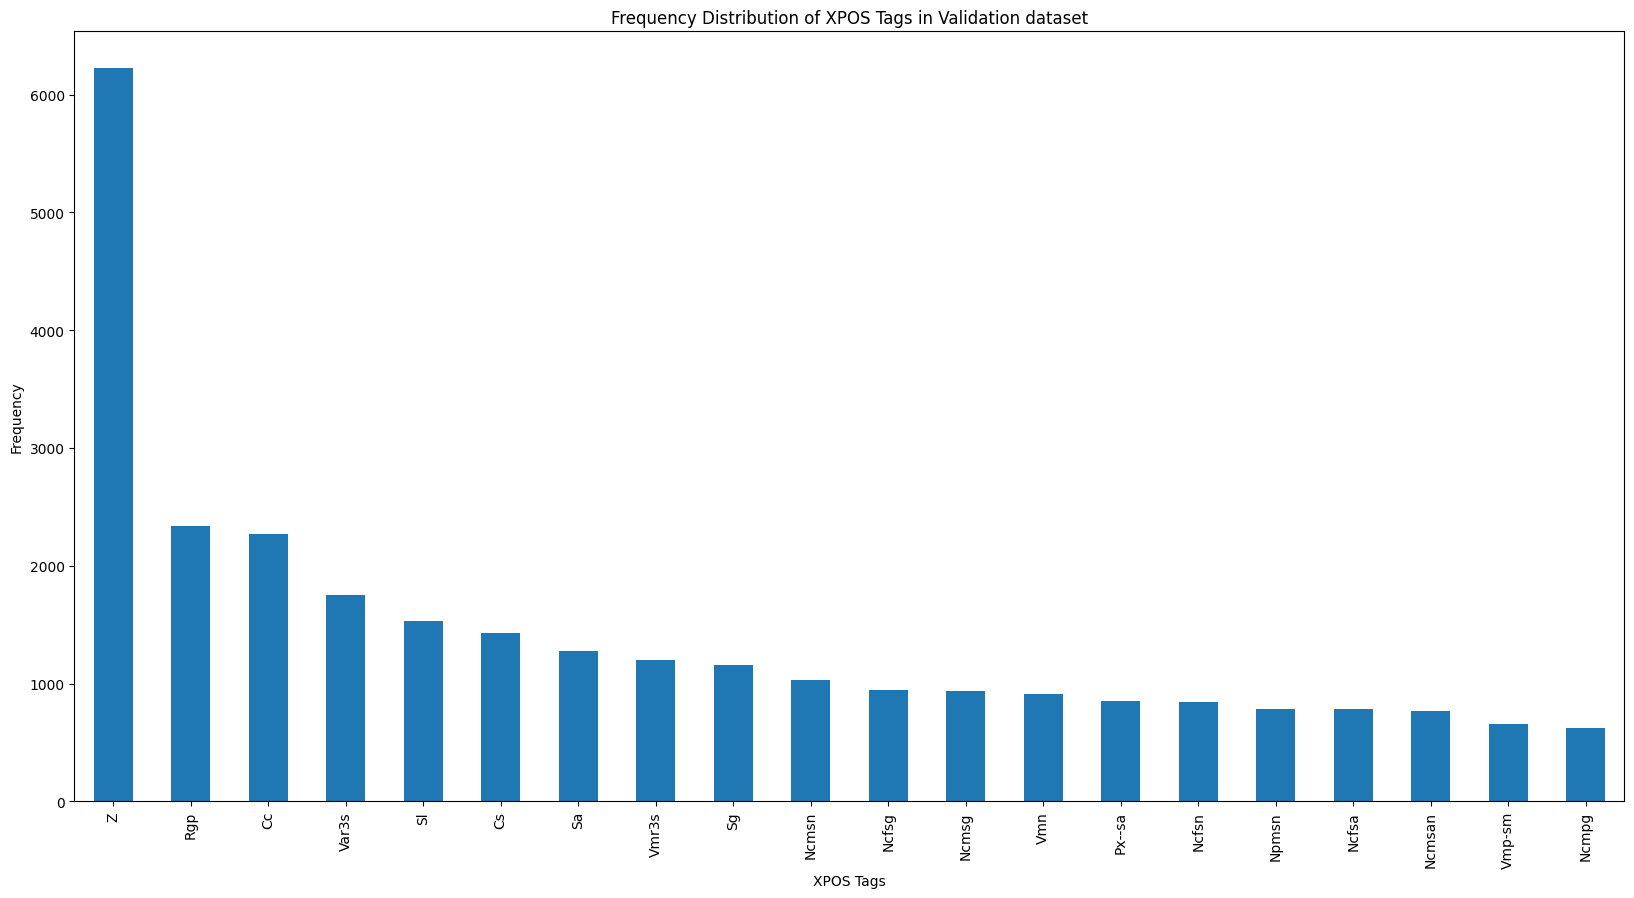

In [ ]:
# Flatten the list of xpos tags
flat_xpos = [item for sublist in xpos_dev for item in sublist]

# Convert to pandas Series and count values
xpos_series = pd.Series(flat_xpos)
xpos_counts = xpos_series.value_counts()

# Plot
plt.figure(figsize=(20, 10))
# Plot the top N categories
N = 20
xpos_counts[:N].plot(kind='bar')
plt.title('Frequency Distribution of XPOS Tags in Validation dataset')
plt.xlabel('XPOS Tags')
plt.ylabel('Frequency')
plt.show()

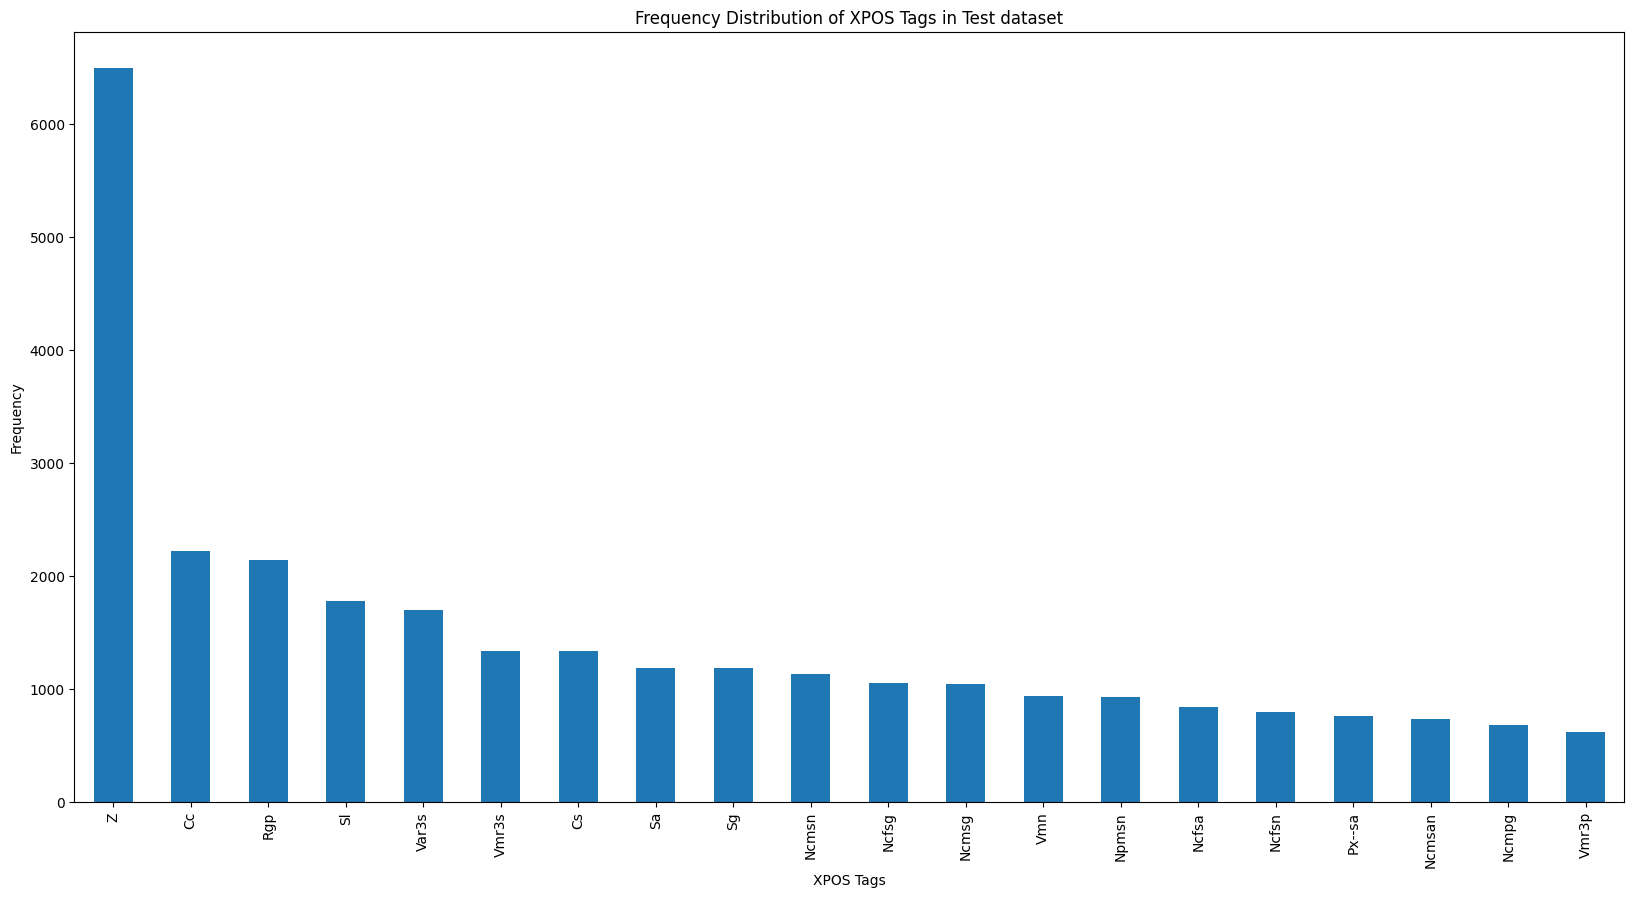

In [ ]:
# Flatten the list of xpos tags
flat_xpos = [item for sublist in xpos_test for item in sublist]

# Convert to pandas Series and count values
xpos_series = pd.Series(flat_xpos)
xpos_counts = xpos_series.value_counts()

# Plot
plt.figure(figsize=(20, 10))
# Plot the top N categories
N = 20
xpos_counts[:N].plot(kind='bar')
plt.title('Frequency Distribution of XPOS Tags in Test dataset')
plt.xlabel('XPOS Tags')
plt.ylabel('Frequency')
plt.show()

When dealing with a large number of categories, a histogram can become cluttered and difficult to read. To address this issue, we have chosen to highlight only the top 20 categories with the highest frequency. This approach allows us to focus on the most prevalent categories, making the visualization more manageable and easier to interpret.

### Sentence Length Distribution

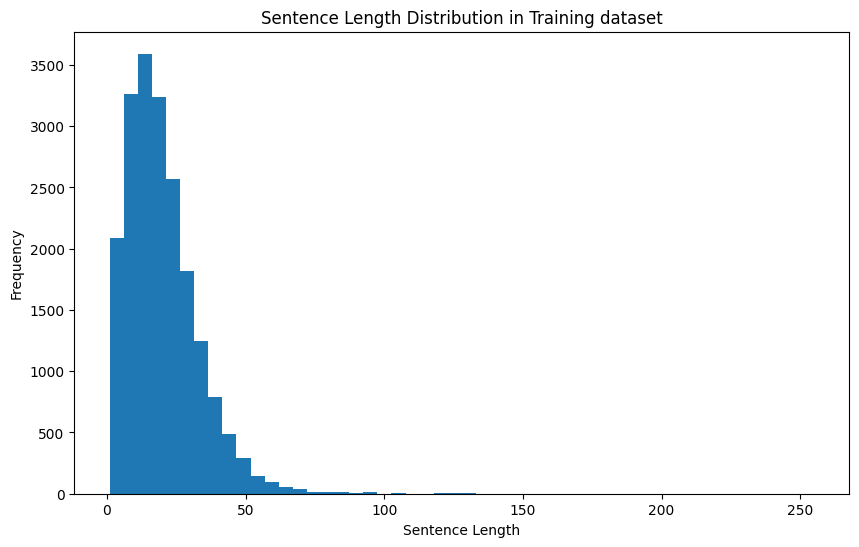

In [ ]:
# Calculate sentence lengths
sentence_lengths = [len(tokens) for tokens in tokens_train]

# Convert to pandas Series
lengths_series = pd.Series(sentence_lengths)

# Plot
plt.figure(figsize=(10,6))
lengths_series.plot(kind='hist', bins=50)
plt.title('Sentence Length Distribution in Training dataset')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

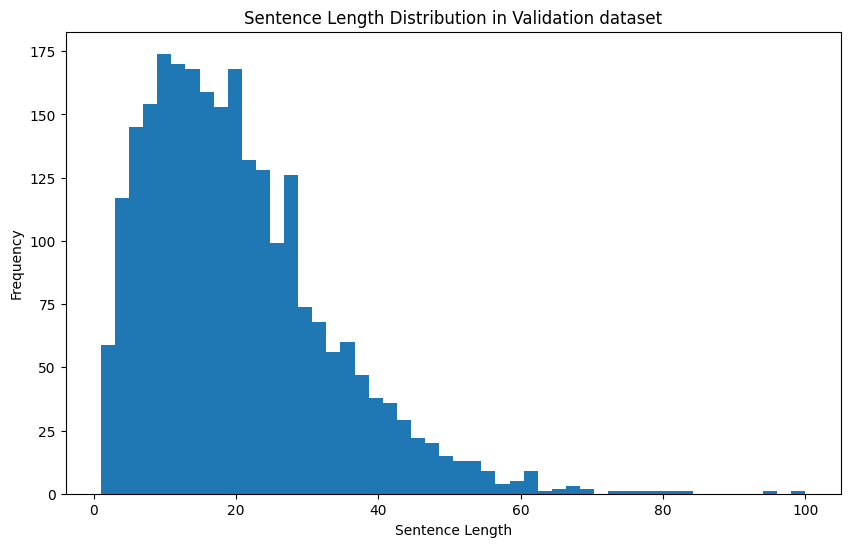

In [ ]:
# Calculate sentence lengths
sentence_lengths = [len(tokens) for tokens in tokens_dev]

# Convert to pandas Series
lengths_series = pd.Series(sentence_lengths)

# Plot
plt.figure(figsize=(10,6))
lengths_series.plot(kind='hist', bins=50)
plt.title('Sentence Length Distribution in Validation dataset')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

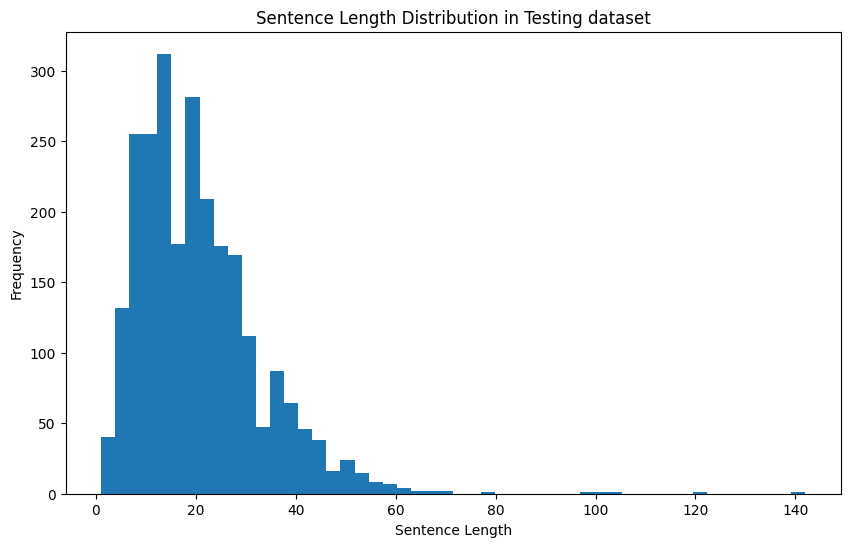

In [ ]:
# Calculate sentence lengths
sentence_lengths = [len(tokens) for tokens in tokens_test]

# Convert to pandas Series
lengths_series = pd.Series(sentence_lengths)

# Plot
plt.figure(figsize=(10,6))
lengths_series.plot(kind='hist', bins=50)
plt.title('Sentence Length Distribution in Testing dataset')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

By plotting the lengths of sentences, we can understand the variability and distribution of sentence lengths in our dataset.

*  It helps us get a sense of the sentence complexity in our text. Short sentences
might indicate a simpler text, while longer sentences might indicate a more complex or detailed text.
*  The distribution of sentence lengths can influence decisions we make when preprocessing our data for machine learning models. For example, if most sentences are short, we might decide to truncate or pad sentences to a smaller fixed length.
*  Some models have limitations on the length of the input sequences. Knowing the distribution of sentence lengths can help us choose appropriate models or adjust model parameters.

### Word Cloud of Tokens

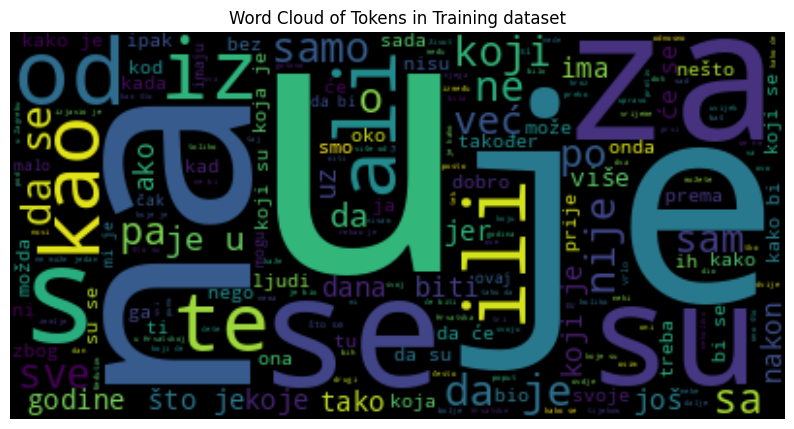

In [ ]:
# Flatten the list of tokens
flat_tokens = ' '.join([item for sublist in tokens_train for item in sublist])

# Create and generate a word cloud image
wordcloud = WordCloud().generate(flat_tokens)

# Display the generated image
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tokens in Training dataset')
plt.axis("off")
plt.show()

In [ ]:
word_frequencies_train = Counter()

for sentence in X_train:
  for word in sentence:
    if word not in (".", "?", "!", ",", ";", "'", "-", "»", "«", "(", ")", "/", ":", "“", "„", "”", "..", "...", '"'):
      word_frequencies_train.update({word})

print('The ten most common words and their frequencies in the training dataset: \n')
print(word_frequencies_train.most_common(10))

The ten most common words and their frequencies in the training dataset: 

[('i', 12005), ('je', 11116), ('u', 9591), ('se', 6073), ('na', 5259), ('da', 4848), ('za', 3802), ('su', 3484), ('od', 2502), ('s', 2150)]


<ipython-input-58-277a83d406c1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words_train, y=word_frequencies2_train, palette="viridis")


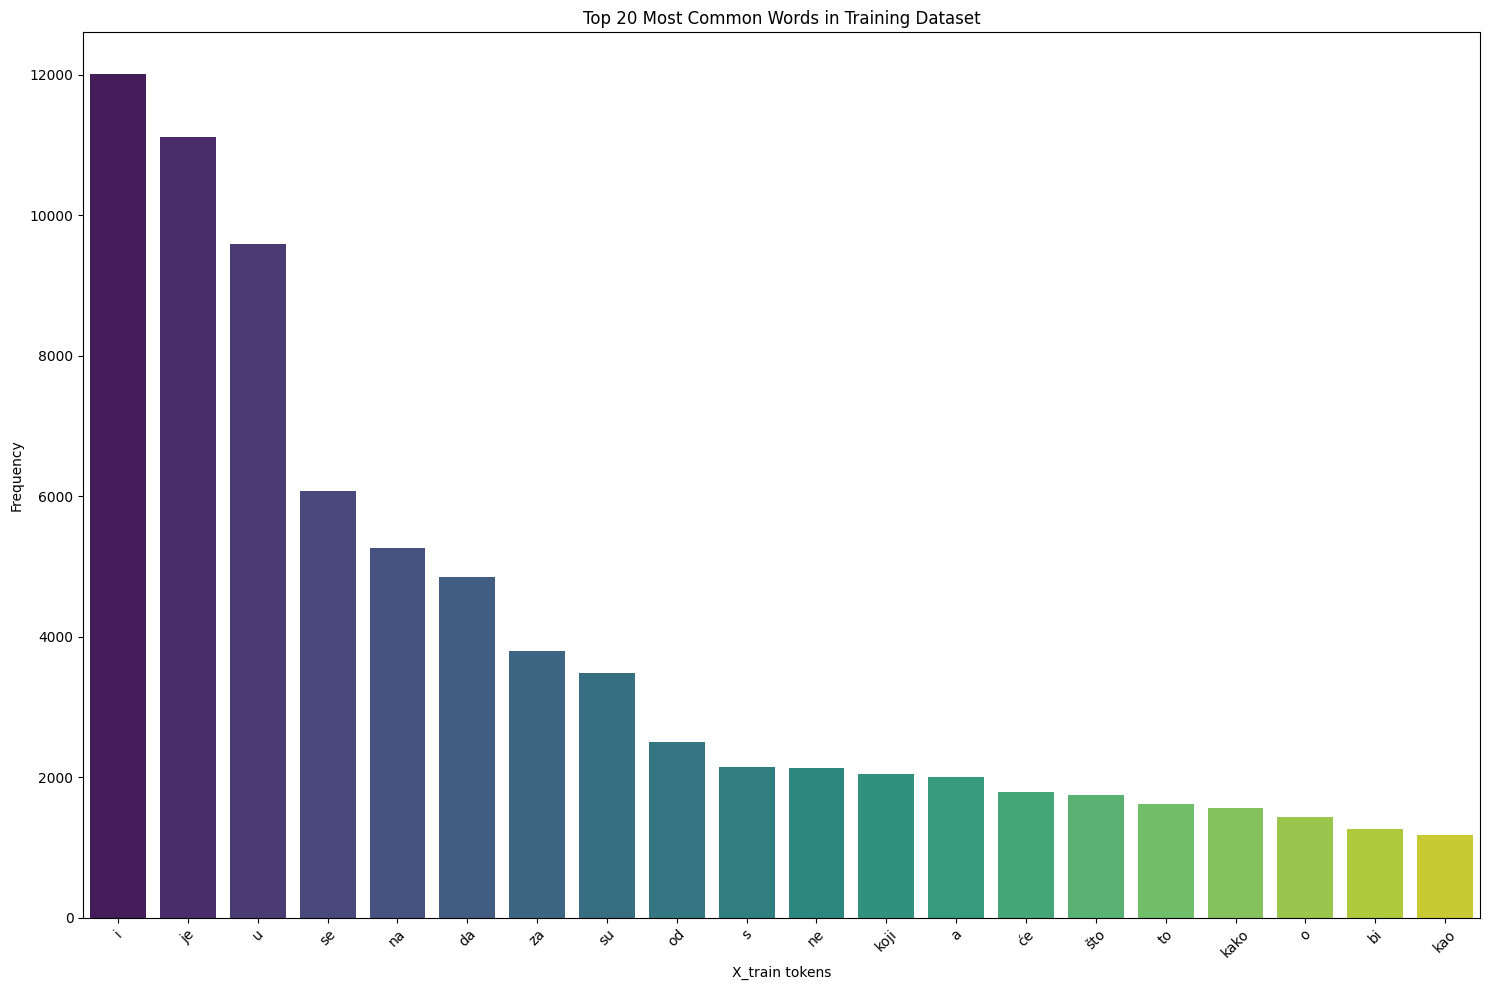

In [ ]:
# Get the top 20 most common words and their frequencies
top_words_train = [x for x, y in word_frequencies_train.most_common(20)]
word_frequencies2_train = [y for x, y in word_frequencies_train.most_common(20)]

# Create a bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x=top_words_train, y=word_frequencies2_train, palette="viridis")
plt.xlabel("X_train tokens")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Training Dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

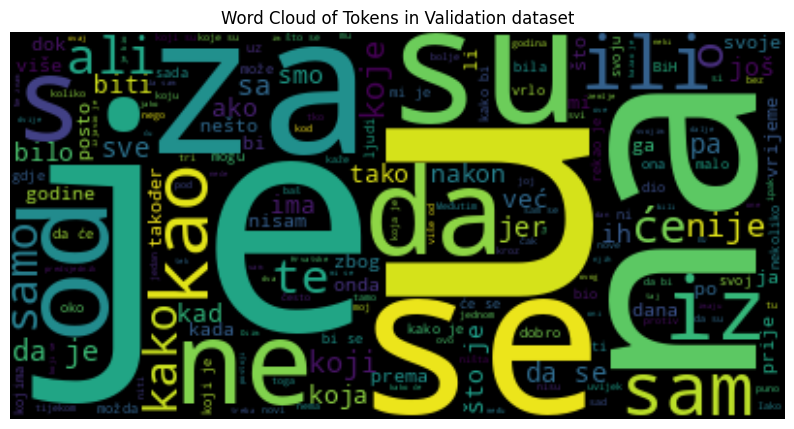

In [ ]:
# Flatten the list of tokens
flat_tokens = ' '.join([item for sublist in tokens_dev for item in sublist])

# Create and generate a word cloud image
wordcloud = WordCloud().generate(flat_tokens)

# Display the generated image
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tokens in Validation dataset')
plt.axis("off")
plt.show()

In [ ]:
word_frequencies_dev = Counter()

for sentence in X_dev:
  for word in sentence:
    if word not in (".", "?", "!", ",", ";", "'", "-", "»", "«", "(", ")", "/", ":", "“", "„", "”", "..", "...", '"'):
      word_frequencies_dev.update({word})

print('The ten most common words and their frequencies in the validation dataset: \n')
print(word_frequencies_dev.most_common(10))

The ten most common words and their frequencies in the validation dataset: 

[('i', 1568), ('je', 1412), ('u', 1155), ('se', 844), ('na', 698), ('da', 587), ('za', 498), ('su', 420), ('od', 312), ('ne', 272)]


<ipython-input-61-2c0e4539fc69>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words_dev, y=word_frequencies2_dev, palette="viridis")


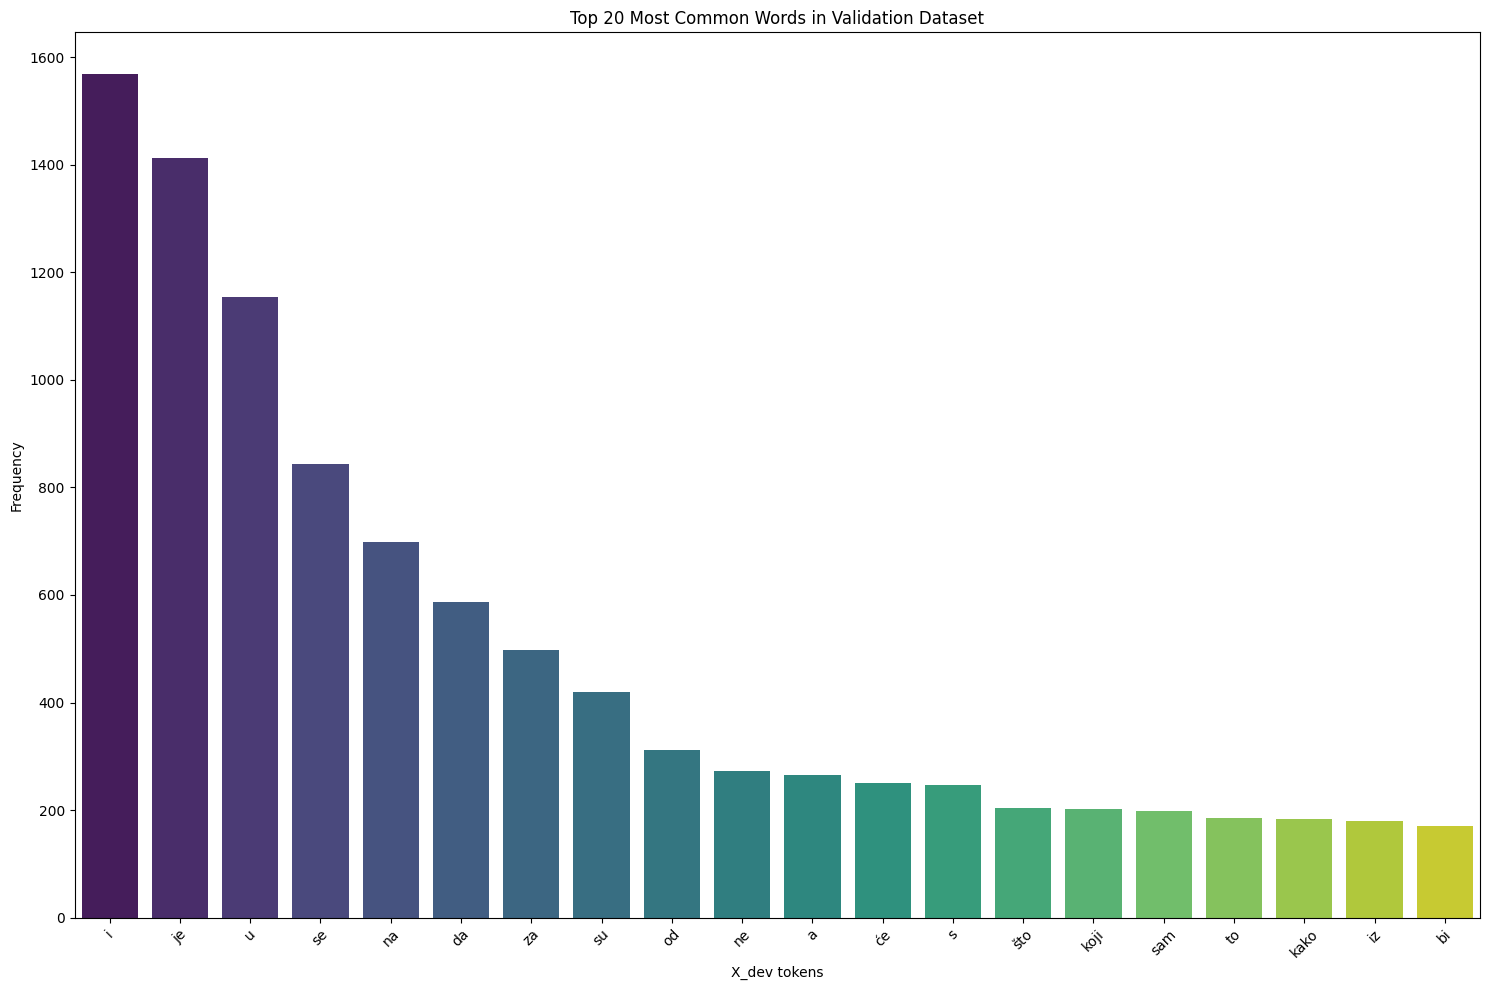

In [ ]:
# Get the top 20 most common words and their frequencies
top_words_dev = [x for x, y in word_frequencies_dev.most_common(20)]
word_frequencies2_dev = [y for x, y in word_frequencies_dev.most_common(20)]

# Create a bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x=top_words_dev, y=word_frequencies2_dev, palette="viridis")
plt.xlabel("X_dev tokens")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Validation Dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

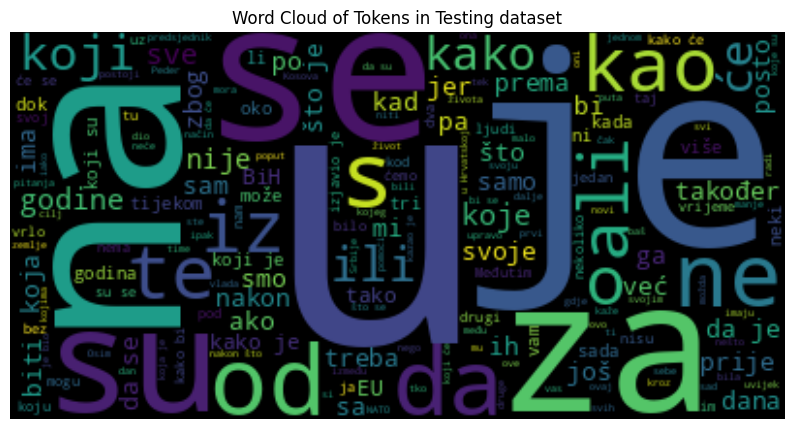

In [ ]:
# Flatten the list of tokens
flat_tokens = ' '.join([item for sublist in tokens_test for item in sublist])

# Create and generate a word cloud image
wordcloud = WordCloud().generate(flat_tokens)

# Display the generated image
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tokens in Testing dataset')
plt.axis("off")
plt.show()

In [ ]:
word_frequencies_test = Counter()

for sentence in X_test:
  for word in sentence:
    if word not in (".", "?", "!", ",", ";", "'", "-", "»", "«", "(", ")", "/", ":", "“", "„", "”", "..", "...", '"'):
      word_frequencies_test.update({word})

print('The ten most common words and their frequencies in the testing dataset: \n')
print(word_frequencies_test.most_common(10))

The ten most common words and their frequencies in the testing dataset: 

[('i', 1591), ('je', 1355), ('u', 1279), ('se', 743), ('na', 668), ('da', 515), ('za', 488), ('su', 435), ('od', 309), ('s', 277)]


<ipython-input-64-981a6e95ef36>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words_test, y=word_frequencies2_test, palette="viridis")


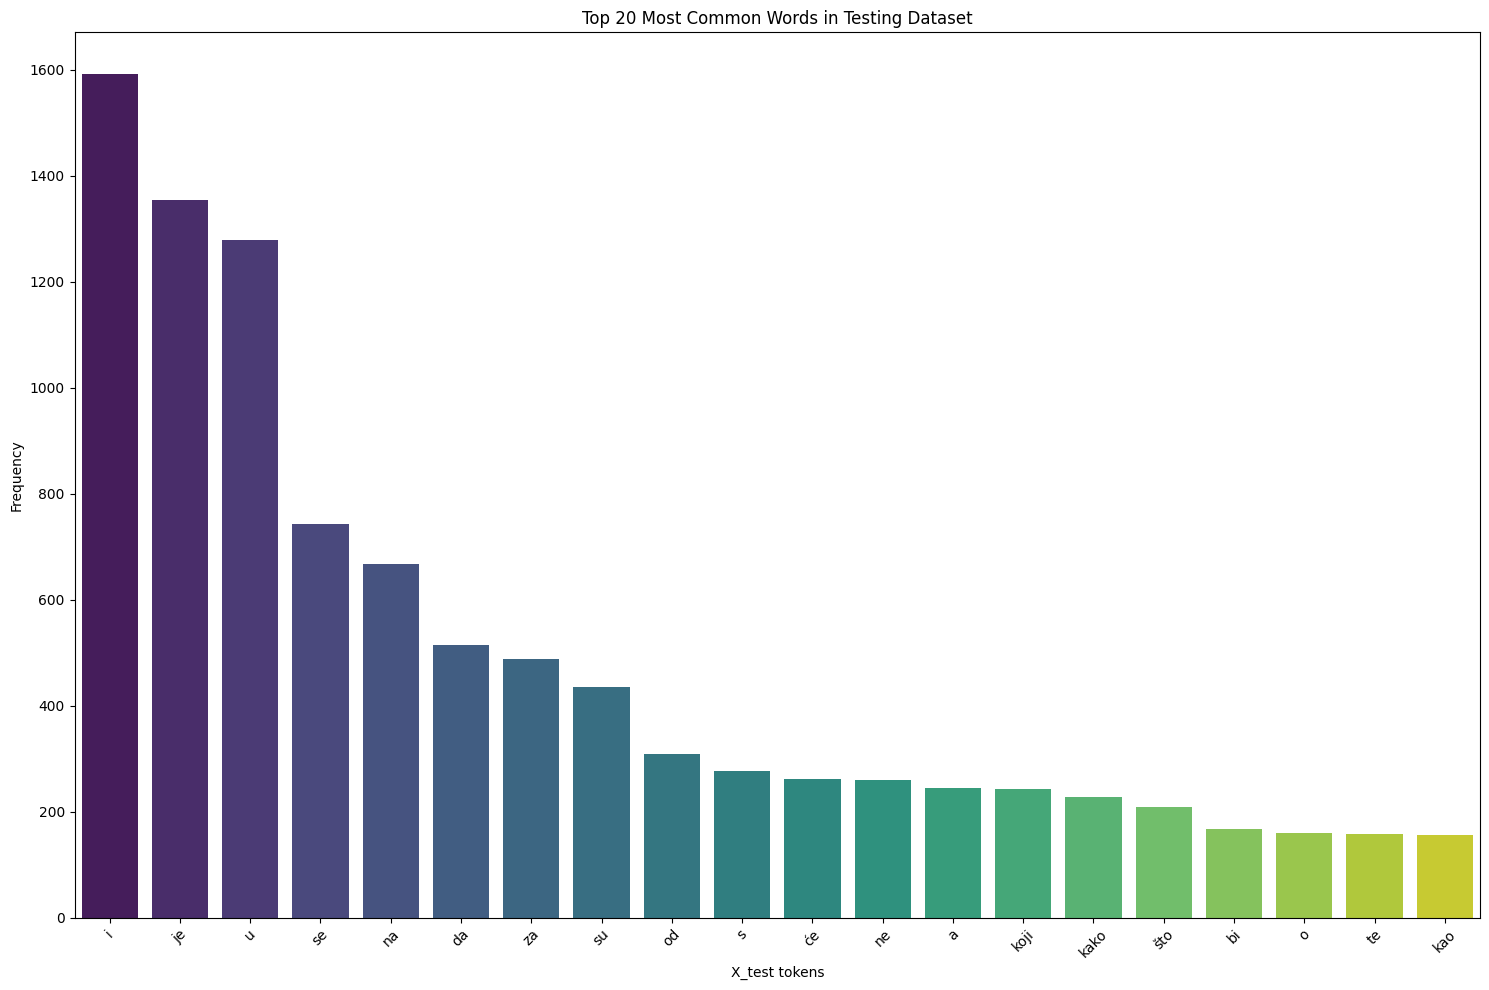

In [ ]:
# Get the top 20 most common words and their frequencies
top_words_test = [x for x, y in word_frequencies_test.most_common(20)]
word_frequencies2_test = [y for x, y in word_frequencies_test.most_common(20)]

# Create a bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x=top_words_test, y=word_frequencies2_test, palette="viridis")
plt.xlabel("X_test tokens")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Testing Dataset")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Word Cloud provides a visual representation of the most frequent words in your text data. It’s a useful tool for quickly understanding the main themes or concepts in a large text dataset.

## 5. Saving a new dataset

In [ ]:
# Saving the training data in a new .csv file
new_file_path_train = '/content/drive/MyDrive/NLP2024/hr500k-train.csv'

data_train.to_csv(new_file_path_train, index=False)

In [ ]:
# Saving the validation data in a new .csv file
new_file_path_dev = '/content/drive/MyDrive/NLP2024/hr500k-dev.csv'

data_dev.to_csv(new_file_path_dev, index=False)

In [ ]:
# Saving the testing data in a new .csv file
new_file_path_test = '/content/drive/MyDrive/NLP2024/hr500k-test.csv'

data_test.to_csv(new_file_path_test, index=False)